# StampTour dataset preprocessing

In [1]:
use_table = 'tripadvisor'    # 'tripadvisor' or 'review'
use_filtering = True   # False or True

In [2]:
import os
import shutil
import sys

import numpy as np
from scipy import sparse
import pandas as pd

### Load Data

In [3]:
# Set directory of the stamptour dataset
DATA_DIR = "./raw_data/"

In [4]:
raw_data = pd.read_json(os.path.join(DATA_DIR, 'tripadvisor.json'), encoding='utf-8')
raw_data.head()

,id,place,uid,title,content,rating,likes,time
0,1,경복궁,George_Korean,대한민국의 역사,대한민국의 역사가 잠들어 있는 곳. 서울을 방문했다면 꼭 방문해야 되는 곳. 경복궁...,50,39,작성했습니다. 2020년 10월
1,2,경복궁,hshdsc408,국민이 공감하는 장소,경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에 자주 가족들과 방문\n하고 있음....,50,0,작성했습니다. 2020년 9월
2,3,경복궁,Expedition705263,산책하기 좋은 경복궁,날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해지는 기분이라고 할까요? ...,50,0,리뷰를 작성했습니다. 2020년 4월
3,4,경복궁,guuming,Good,Goooooood 다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고 먹을거리도많...,50,0,작성했습니다. 2020년 4월
4,5,경복궁,ruffy1977,가족단위로 방문하기 좋은곳,요새 더더욱 코로나로 인해 사람 방문이 적음. 두자녀 동반시 성인 입장무료. 지금 ...,50,0,리뷰를 작성했습니다. 2020년 4월


### 데이터 분석

In [5]:
import matplotlib.pyplot as plt

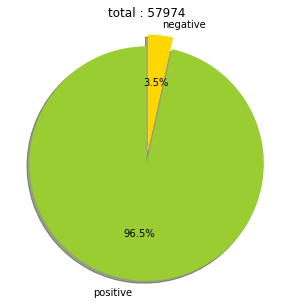

In [6]:
review = raw_data
total = len(review)
threshold = 30
xlabel = ['positive','negative']
pos = len(review[review['rating']>=threshold])
neg = len(review[review['rating']<threshold])
y = [pos, neg]
x = np.arange(len(y))

plt.figure(figsize=(5, 5))
plt.axis('equal')
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)
plt.title(f'total : {total}')
plt.pie(y, explode=explode, labels=xlabel, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

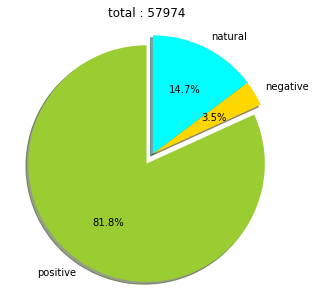

In [7]:
threshold = 30
xlabel = ['positive','negative','natural']
pos = len(review[review['rating']>threshold])
neg = len(review[review['rating']<threshold])
natural = len(review[review['rating']==threshold])
y = [pos, neg, natural]
x = np.arange(len(y))

plt.figure(figsize=(5, 5))
plt.axis('equal')
colors = ['yellowgreen', 'gold', 'cyan']
explode = (0.1, 0,0)
plt.title(f'total : {total}')
plt.pie(y, explode=explode, labels=xlabel, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

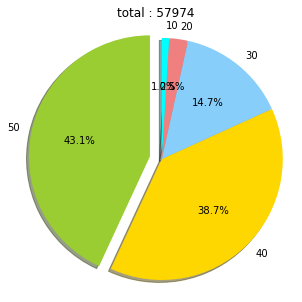

In [8]:
xlabel = review['rating'].value_counts().index.tolist()
y = review['rating'].value_counts().tolist()
x = np.arange(len(y))

plt.figure(figsize=(5, 5))
plt.axis('equal')
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan']
explode = (0.1, 0, 0, 0,0)
plt.title(f'total : {total}')
plt.pie(y, explode=explode, labels=xlabel, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

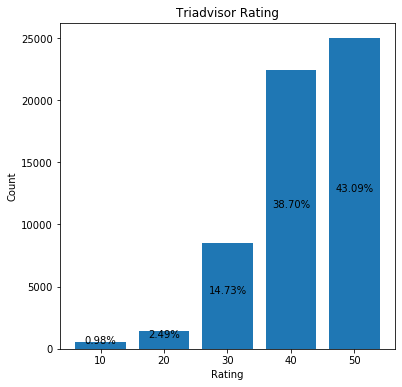

In [10]:
xlabel = review['rating'].value_counts().index.tolist()
y = review['rating'].value_counts().tolist()
x = sorted(np.arange(len(y)),reverse=True)

fig = plt.figure(figsize=(6, 6))
bar = plt.bar(x,y)
plt.xticks(x, xlabel)
plt.title('Triadvisor Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
for rect in bar:
    height = rect.get_height()
    percent = height/total*100
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2.0, f'{percent:.2f}%', ha='center', va='bottom')
plt.show()

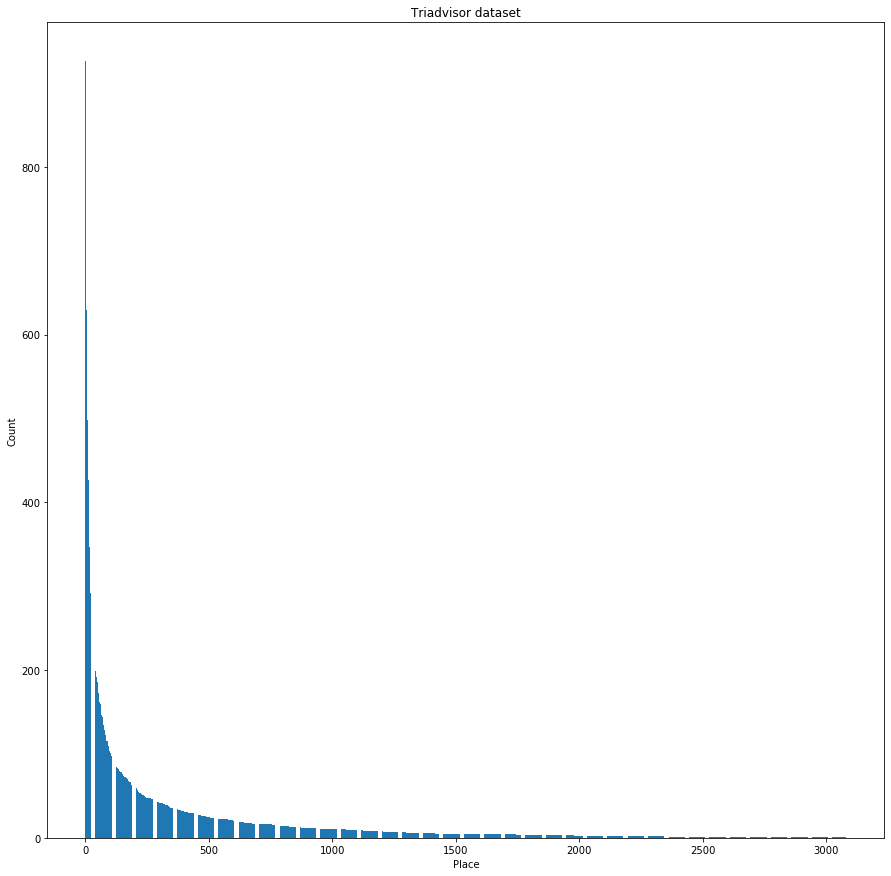

In [12]:
xlabel = review['place'].value_counts().index.tolist()
y = review['place'].value_counts().tolist()
x = np.arange(len(y))

fig = plt.figure(figsize=(15, 15))
plt.bar(x,y)
#plt.xticks(x, xlabel)
plt.title('Triadvisor dataset')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

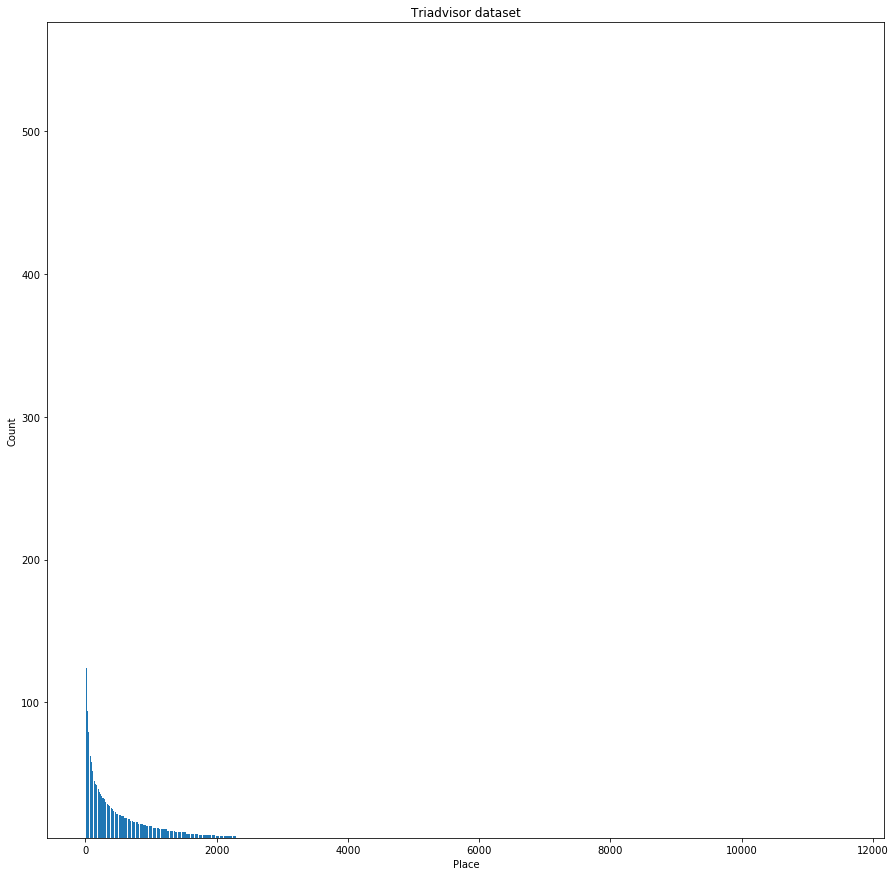

In [14]:
xlabel = review['uid'].value_counts().index.tolist()
y = review['uid'].value_counts().tolist()
x = np.arange(len(y))

fig = plt.figure(figsize=(15, 15))
plt.bar(x,y)
#plt.xticks(x, xlabel)
plt.title('Triadvisor dataset')
plt.xlabel('Place')
plt.ylabel('Count')
plt.ylim(bottom=5)
plt.show()

In [7]:
raw_data.shape

(56974, 9)

### 데이터 전처리

In [5]:
total_user = len(set(raw_data.uid))
total_item = len(set(raw_data.place))
n_review = len(raw_data)

print(f" 전체 사용자: {total_user}")
print(f" 전체 관광지: {total_item}")
print(f" 리뷰 수: {n_review}")
print()
sparsity = n_review/(total_user*total_item)*100
print(f" 희소성: {sparsity:.3f}%")

 전체 사용자: 11595
 전체 관광지: 3081
 리뷰 수: 57974

 희소성: 0.162%


In [8]:
raw_data = raw_data.drop_duplicates(['uid', 'place'], keep='first').reset_index()

In [9]:
threshold=20

feature = ['uid','place','rating']
raw_data = raw_data[feature]
raw_data['rating'][raw_data['rating']<=threshold]=0
raw_data['rating'][raw_data['rating']>threshold]=1
raw_data.head()

C:\Users\170544\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uid,place,rating
0,George_Korean,경복궁,1
1,hshdsc408,경복궁,1
2,Expedition705263,경복궁,1
3,guuming,경복궁,1
4,ruffy1977,경복궁,1


In [11]:
user_dict = dict()
i=0
for uid in list(set(raw_data.uid)):
    user_dict[uid] = i
    i+=1
    
place_dict = dict()
i=0
for place in list(set(raw_data.place)):
    place_dict[place] = i
    i+=1
    
user_dict, place_dict

({'F9761WE_': 0,
  'Voyage749354': 1,
  'Seaside806550': 2,
  'ychan1949': 3,
  'binsjins': 4,
  'beachseeker14': 5,
  'KangMyeongHyeon': 6,
  'Bongtravel890': 7,
  'oriwife': 8,
  'capsilver8013': 9,
  'Venture770794': 10,
  'Ambassador805831': 11,
  'MyeongSeongK1': 12,
  'lovehanra': 13,
  'kimmolla': 14,
  'sia3107': 15,
  'hope601116': 16,
  '392jihyunh': 17,
  'Explore807187': 18,
  'tahoch': 19,
  'hajilee': 20,
  'BoardingPass810964': 21,
  'Escape807710': 22,
  'KKungD': 23,
  'KimM5794': 24,
  'mrpres461': 25,
  'MariaP0nce': 26,
  'Odyssey807940': 27,
  'herenow365': 28,
  'FarAway808787': 29,
  'wonderp2017': 30,
  'shim7138': 31,
  'ChungkyuCho': 32,
  'Storyteller808720': 33,
  'ksh8240': 34,
  'HarryK1568': 35,
  'JayJang7604': 36,
  'Fearless692679': 37,
  'Sunshine812620': 38,
  'eommefatale': 39,
  'gogogo7738': 40,
  'Kaaarinkim': 41,
  'YounWooY': 42,
  'yoonisky': 43,
  'HanNaL1652': 44,
  'Tourist413154': 45,
  'Travel702954': 46,
  'bona01': 47,
  'kim3rich': 48,

In [12]:
for i in range(len(raw_data)):
    raw_data.uid[i] = user_dict[raw_data.uid[i]]
    
for i in range(len(raw_data)):
    raw_data.place[i] = place_dict[raw_data.place[i]]

C:\Users\170544\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\170544\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Data splitting procedure

In [13]:
def get_count(tp, id):
    playcount_groupbyid = tp[[id]].groupby(id, as_index=False)
    count = playcount_groupbyid.size()
    return count

In [14]:
def filter_triplets(tp, min_uc=5, min_sc=0):
    # Only keep the triplets for items which were clicked on by at least min_sc users. 
    if min_sc > 0:
        itemcount = get_count(tp, 'place')
        tp = tp[tp['place'].isin(itemcount.index[itemcount >= min_sc])]
    
    # Only keep the triplets for users who clicked on at least min_uc items
    # After doing this, some of the items will have less than min_uc users, but should only be a small proportion
    if min_uc > 0:
        usercount = get_count(tp, 'uid')
        tp = tp[tp['uid'].isin(usercount.index[usercount >= min_uc])]
    
    # Update both usercount and itemcount after filtering
    usercount, itemcount = get_count(tp, 'uid'), get_count(tp, 'place') 
    return tp, usercount, itemcount

Only keep users who have watched at least 5 movies

In [13]:
min_user_count = 5 if use_filtering else 0

In [14]:
raw_data, user_activity, item_popularity = filter_triplets(raw_data, min_uc=min_user_count, min_sc=0)

In [15]:
sparsity = 1. * raw_data.shape[0] / (user_activity.shape[0] * item_popularity.shape[0])

print("After filtering, there are %d watching events from %d users and %d movies (sparsity: %.3f%%)" % 
      (raw_data.shape[0], user_activity.shape[0], item_popularity.shape[0], sparsity * 100))

After filtering, there are 42679 watching events from 2697 users and 2974 movies (sparsity: 0.532%)


In [16]:
unique_uid = user_activity.index

np.random.seed(98765)
idx_perm = np.random.permutation(unique_uid.size)
unique_uid = unique_uid[idx_perm]

In [17]:
if use_table == 'tripadvisor':
    if use_filtering:
        n_heldout_users = int(user_activity.shape[0]*0.1)
    else:
        n_heldout_users = 1200
elif use_table == 'review':
    if use_filtering:
        n_heldout_users = int(user_activity.shape[0]*0.1)
    else:
        n_heldout_users = 80
else:
    n_heldout_users = 0

In [18]:
# create train/validation/test users
n_users = unique_uid.size

tr_users = unique_uid[:(n_users - n_heldout_users * 2)]
vd_users = unique_uid[(n_users - n_heldout_users * 2): (n_users - n_heldout_users)]
te_users = unique_uid[(n_users - n_heldout_users):]

In [19]:
train_plays = raw_data.loc[raw_data['uid'].isin(tr_users)]

In [20]:
unique_sid = pd.unique(train_plays['place'])

In [21]:
show2id = dict((sid, i) for (i, sid) in enumerate(unique_sid))
profile2id = dict((pid, i) for (i, pid) in enumerate(unique_uid))

In [22]:
if use_table == 'tripadvisor':
    if use_filtering:
        pro_dir = "./tripadvisor_relation_use_filtering/"
    else:
        pro_dir = "./tripadvisor_relation_not_filtering/"
elif use_table == 'review':
    if use_filtering:
        pro_dir = "./tripadvisor_review_existence_use_filtering/"
    else:
        pro_dir = "./tripadvisor_review_existence_not_filtering/"
else:
    pro_dir = "./"

In [23]:
if not os.path.exists(pro_dir):
    os.makedirs(pro_dir)

with open(os.path.join(pro_dir, 'unique_sid.txt'), 'w') as f:
    for sid in unique_sid:
        f.write('%s\n' % sid)

with open(os.path.join(pro_dir, 'unique_uid.txt'), 'w') as f:
    for uid in unique_uid:
        f.write('%s\n' % uid)

In [24]:
def split_train_test_proportion(data, test_prop=0.2):
    data_grouped_by_user = data.groupby('uid')
    tr_list, te_list = list(), list()

    np.random.seed(98765)

    for i, (_, group) in enumerate(data_grouped_by_user):
        n_items_u = len(group)
        idx = np.zeros(n_items_u, dtype='bool')
        te_size = 1
        if n_items_u >= 5:
            te_size = int(test_prop * n_items_u)
            
        idx[np.random.choice(n_items_u, size=te_size, replace=False).astype('int64')] = True
        tr_list.append(group[np.logical_not(idx)])
        te_list.append(group[idx])

        if i % 1000 == 0:
            print("%d users sampled" % i)
            sys.stdout.flush()

    data_tr = pd.concat(tr_list)
    data_te = pd.concat(te_list)
    
    return data_tr, data_te

In [25]:
vad_plays = raw_data.loc[raw_data['uid'].isin(vd_users)]
vad_plays = vad_plays.loc[vad_plays['place'].isin(unique_sid)]

In [26]:
vad_plays, _, _ = filter_triplets(vad_plays, min_uc=min_user_count, min_sc=0)

In [27]:
vad_plays_tr, vad_plays_te = split_train_test_proportion(vad_plays)

0 users sampled


In [28]:
test_plays = raw_data.loc[raw_data['uid'].isin(te_users)]
test_plays = test_plays.loc[test_plays['place'].isin(unique_sid)]

In [29]:
test_plays_tr, test_plays_te = split_train_test_proportion(test_plays)

0 users sampled


In [30]:
test_plays, _, _ = filter_triplets(test_plays, min_uc=min_user_count, min_sc=0)

In [31]:
len(set(test_plays_tr.uid)), len(set(test_plays_te.uid))

(269, 269)

### Save the data into (user_index, item_index) format

In [32]:
def numerize(tp):
    uid = list(map(lambda x: profile2id[x], tp['uid']))
    sid = list(map(lambda x: show2id[x], tp['place']))
    value = list(map(lambda x: x, tp['rating']))
    return pd.DataFrame(data={'uid': uid, 'sid': sid, 'value': value}, columns=['uid', 'sid', 'value'])

In [33]:
train_data = numerize(train_plays)
train_data.to_csv(os.path.join(pro_dir, 'train.csv'), index=False)

In [34]:
vad_data_tr = numerize(vad_plays_tr)
vad_data_tr.to_csv(os.path.join(pro_dir, 'validation_tr.csv'), index=False)

In [35]:
vad_data_te = numerize(vad_plays_te)
vad_data_te.to_csv(os.path.join(pro_dir, 'validation_te.csv'), index=False)

In [36]:
test_data_tr = numerize(test_plays_tr)
test_data_tr.to_csv(os.path.join(pro_dir, 'test_tr.csv'), index=False)

In [37]:
test_data_te = numerize(test_plays_te)
test_data_te.to_csv(os.path.join(pro_dir, 'test_te.csv'), index=False)

In [38]:
tr = list()
for i, (_, group) in enumerate(test_data_tr.groupby('uid')):
    n_items_u = len(group)
    tr.append(n_items_u)
    
te = list()
for i, (_, group) in enumerate(test_data_te.groupby('uid')):
    n_items_u = len(group)
    te.append(n_items_u)

In [39]:
for i,j in zip(tr,te):
    print(i,j)

8 1
5 1
10 2
4 1
5 1
16 3
20 5
9 2
8 2
12 2
4 1
7 1
4 1
16 3
4 1
4 1
7 1
5 1
9 2
6 1
16 3
7 1
6 1
4 1
9 2
11 2
5 1
14 3
9 2
8 2
5 1
4 1
37 9
4 1
12 3
11 2
4 1
10 2
6 1
5 1
15 3
8 1
8 1
5 1
15 3
6 1
5 1
5 1
8 1
5 1
4 1
48 11
5 1
104 26
10 2
7 1
31 7
12 3
11 2
4 1
23 5
35 8
11 2
5 1
7 1
4 1
14 3
13 3
4 1
3 1
9 2
12 3
16 4
22 5
8 1
8 2
8 2
4 1
4 1
10 2
15 3
28 6
5 1
4 1
8 2
18 4
16 4
16 4
7 1
7 1
4 1
9 2
9 2
24 6
5 1
4 1
6 1
8 2
13 3
32 7
3 1
10 2
6 1
6 1
14 3
19 4
5 1
32 8
5 1
8 2
5 1
5 1
12 3
4 1
4 1
46 11
34 8
64 15
12 2
6 1
28 7
20 4
7 1
6 1
7 1
7 1
5 1
8 1
4 1
5 1
16 4
4 1
16 3
4 1
38 9
9 2
6 1
12 2
4 1
17 4
5 1
4 1
5 1
13 3
9 2
7 1
12 2
8 1
17 4
5 1
7 1
25 6
5 1
24 5
4 1
13 3
5 1
103 25
32 7
52 13
5 1
6 1
6 1
14 3
17 4
10 2
20 4
4 1
10 2
10 2
6 1
16 4
8 1
9 2
9 2
4 1
4 1
16 4
8 1
5 1
12 2
7 1
8 2
9 2
5 1
4 1
8 2
4 1
12 2
9 2
23 5
80 19
8 2
14 3
19 4
6 1
20 4
39 9
6 1
7 1
8 2
4 1
16 3
13 3
4 1
32 7
19 4
6 1
12 2
5 1
4 1
12 3
24 5
8 2
6 1
5 1
8 1
5 1
7 1
6 1
4 1
4 1
4 1
40 9
12 3
9 2
